<a href="https://colab.research.google.com/github/JoshRogers18/Image-ML-Classifier/blob/main/Build_Machine_Learning_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Guided Project: Build an Image Classifier with Python**

In [ ]:
#Here we load the Mnist data from Keras
# Tensorflow is used for machine learning and for deep neural networks
import tensorflow as tf
# Loan and split data. Will be using keras for artifical neural networks that will act as an interface for tensorflow
# Data is 70,000 images(28x28) of digits 0-9, Modified National Institute of Standards and Technology (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#get an idea of shape of train data
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

5


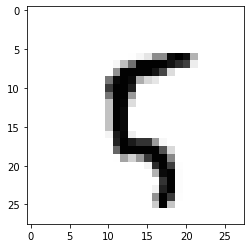

In [ ]:
# Here we preview an element of the data
import matplotlib.pyplot as plt
print(y_train[100]) # To display the label number
plt.imshow(x_train[100], cmap='Greys') #to show the image associated with label

In [ ]:
x_train[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#Reshaping and preprocessing
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
x_train[100]

In [ ]:
#Building to Keras
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential() #chosen Keras model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
model.add(Dropout(0.2)) # prevents overfitting
model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax

In [ ]:
#Compiling and fitting the model
model.compile(optimizer='adam', # used to help neural network iterate
              loss='sparse_categorical_crossentropy', # evalutes how well an algorithm models data 
              metrics=['accuracy']) 
model.fit(x=x_train,y=y_train, epochs=15) # num of iterations

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2561 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1131 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0839 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0676 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0543 - accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0479 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0416 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0373 - accuracy: 0.9870
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0335 - accuracy: 0.9887
Epoch 10/10
1875/1875 [==============================] - 29s 16m

In [ ]:
#evaluating
# show 98% accuracy
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0698 - accuracy: 0.9808


[0.06978865712881088, 0.9807999730110168]

3


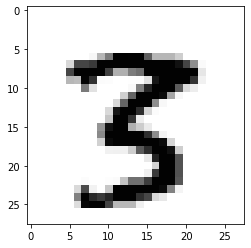

In [ ]:
#testing on test data
image_index = 991 #choose random value up to 10000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys') #running chosen image and outputting 28x28 
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) #runnning prediction model
print(pred.argmax())


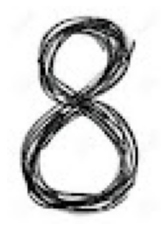

In [ ]:
# Find own image and apply
#Previewing the downloaded image 
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("which.jpg")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [ ]:
# is an 85x60 pixel image across 3 chanels, not in form needed
im.shape

(85, 60, 3)

In [ ]:
from tensorflow.keras.preprocessing import image #Import Keras image processor

In [ ]:
#load downloaded image and resze to target size
img = image.load_img("which.jpg", target_size=(28, 28),color_mode="grayscale")


In [ ]:
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)


In [ ]:
#Confirm new shape, 28x28 by one channel
img_array.shape

(28, 28, 1)

In [ ]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

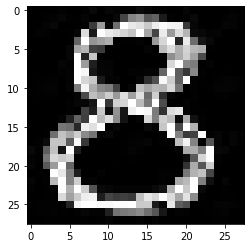

In [ ]:
plt.imshow(img_array,cmap="Greys")

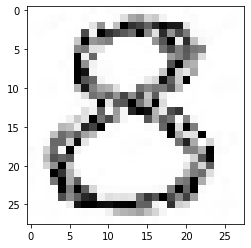

In [ ]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

# Prediction on sample image

3


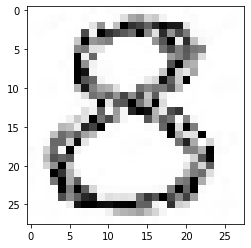

In [ ]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())
